## Netflix Data Analysis 

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df=pd.read_csv(r'netflix_titles.csv')

In [3]:
df.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                                NaN  September 24, 2021   
3                                                NaN  September 24, 2021   
4                                              India  September 24, 2021   
5                                                NaN  September 24, 2021   
6                                                NaN  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

### 1. Data Cleaning 

In [4]:
#Check number of columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
#Drop NaN values in rows
df.dropna(inplace=True)

In [13]:
df.shape

(5332, 12)

In [14]:

#Determine the null percentage count

null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0        show_id              0.0
1           type              0.0
2          title              0.0
3       director              0.0
4           cast              0.0
5        country              0.0
6     date_added              0.0
7   release_year              0.0
8         rating              0.0
9       duration              0.0
10     listed_in              0.0
11   description              0.0


In [15]:
df.head(5)

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdom  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [16]:
df.description[7]

'On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.'

### 2. Review of dataset of Movies and TV shows(Old and New) genre

In [17]:
df.type.head(5)

7       Movie
8     TV Show
9       Movie
12      Movie
24      Movie
Name: type, dtype: object

In [18]:

#Movies and TV shows

tv_show = df[df['type']== 'TV Show']
movie = df[df['type']== 'Movie']

In [19]:
display(movie.head(5),'----------------------------------------')
display(tv_show.head(5))

show_id   type         title             director  \
7       s8  Movie       Sankofa         Haile Gerima   
9      s10  Movie  The Starling       Theodore Melfi   
12     s13  Movie  Je Suis Karl  Christian Schwochow   
24     s25  Movie         Jeans           S. Shankar   
27     s28  Movie     Grown Ups         Dennis Dugan   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
27  Adam Sandler, Kevin James, Chris Rock, David S...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   
27                                      United States  September 20, 2021   

    release_year rating duration  \
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   
24          1998  TV-14  166 min   
27          2010  PG-13  103 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   
27                                          Comedies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...  
27  Mourning the loss of their beloved junior high...

'----------------------------------------'

show_id     type                                 title  \
8        s9  TV Show         The Great British Baking Show   
198    s199  TV Show  King of Boys: The Return of the King   
273    s274  TV Show                         Gone for Good   
276    s277  TV Show                               Valeria   
297    s298  TV Show                              Navarasa   

                                              director  \
8                                      Andy Devonshire   
198                                       Kemi Adetiba   
273                                 Juan Carlos Medina   
276                                      Inma Torrente   
297  Bejoy Nambiar, Priyadarshan, Karthik Narain, V...   

                                                  cast         country  \
8    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
198  Sola Sobowale, Toni Tones, Richard Mofe-Damijo...         Nigeria   
273  Finnegan Oldfield, Nicolas Duvauchelle, Guilla...          France   
276  Diana Gómez, Silma López, Paula Malia, Teresa ...           Spain   
297  Suriya, Vijay Sethupathi, Revathy, Prakash Raj...           India   

             date_added  release_year rating   duration  \
8    September 24, 2021          2021  TV-14  9 Seasons   
198     August 27, 2021          2021  TV-MA   1 Season   
273     August 13, 2021          2021  TV-MA   1 Season   
276     August 13, 2021          2021  TV-MA  2 Seasons   
297      August 6, 2021          2021  TV-MA   1 Season   

                                             listed_in  \
8                         British TV Shows, Reality TV   
198  Crime TV Shows, International TV Shows, TV Dramas   
273  Crime TV Shows, International TV Shows, TV Dramas   
276  International TV Shows, Romantic TV Shows, Spa...   
297                                           TV Shows   

                                           description  
8    A talented batch of amateur bakers face off in...  
198  Alhaja Eniola Salami starts anew and sets her ...  
273  Ten years after losing two loved ones, a man i...  
276  A writer in creative and marital crises finds ...  
297  From amusement to awe, the nine human emotions...

#### 2.1 Movies and TV shows Genres

In [20]:

movies_df = df[df['type'] == 'Movie']
oldest = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest

show_id   type                 title   director  \
8205   s8206  Movie  The Battle of Midway  John Ford   

                           cast        country      date_added  release_year  \
8205  Henry Fonda, Jane Darwell  United States  March 31, 2017          1942   

     rating duration                      listed_in  \
8205  TV-14   18 min  Classic Movies, Documentaries   

                                            description  
8205  Director John Ford captures combat footage of ...

In [21]:
len(df['listed_in'].unique())

335

In [22]:
#Top 5 movie genres
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()
top_5 = genre_counts.head(5)
print("Top 5 popular genres:-", top_5)

Top 5 popular genres:- listed_in
International Movies    2369
Dramas                  2293
Comedies                1553
Action & Adventure       806
Independent Movies       740
Name: count, dtype: int64


In [23]:
comedy_movies = df[df['listed_in'] == 'Comedies']
comedy_movies.head(3)

show_id   type                          title        director  \
27      s28  Movie                      Grown Ups    Dennis Dugan   
152    s153  Movie  Janoskians: Untold and Untrue    Brett Weiner   
182    s183  Movie    Welcome Home Roscoe Jenkins  Malcolm D. Lee   

                                                  cast        country  \
27   Adam Sandler, Kevin James, Chris Rock, David S...  United States   
152  Jai Brooks, Luke Brooks, James Yammouni, Danie...  United States   
182  Martin Lawrence, James Earl Jones, Joy Bryant,...  United States   

             date_added  release_year rating duration listed_in  \
27   September 20, 2021          2010  PG-13  103 min  Comedies   
152   September 1, 2021          2016  TV-MA   88 min  Comedies   
182   September 1, 2021          2008  PG-13  114 min  Comedies   

                                           description  
27   Mourning the loss of their beloved junior high...  
152  Follow the story of three Australian brothers ...  
182  R.J. travels to Georgia for his parents' 50th ...

In [24]:
#Top 5 Popular cast

cast_counts = df['cast'].str.split(', ').explode().value_counts()
top_5 = cast_counts.head(5)
print("Top 5 popular genres:-", top_5)

Top 5 popular genres:- cast
Anupam Kher         42
Shah Rukh Khan      34
Naseeruddin Shah    31
Akshay Kumar        30
Om Puri             30
Name: count, dtype: int64


In [25]:
recent_movie_data = df[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title                                                                                                                                                          Sankofa
type                                                                                                                                                             Movie
description    On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.
Name: 7, dtype: object


In [26]:
tvshows_df = df[df['type'] == 'TV Show']
oldest = tvshows_df[tvshows_df['release_year'] == tvshows_df['release_year'].min()]
oldest

show_id     type                     title   director  \
7175   s7176  TV Show  Ken Burns: The Civil War  Ken Burns   

                                                                                                                                                                                                                                                                         cast  \
7175  Sam Waterston, Julie Harris, Jason Robards, Morgan Freeman, Paul Roebling, Garrison Keillor, George Black, David McCullough, Arthur Miller, Christopher Murney, Charles McDowell, Horton Foote, George Plimpton, Philip Bosco, Terry Courier, Jody Powell, Studs Terkel   

            country         date_added  release_year rating  duration  \
7175  United States  February 22, 2017          1990  TV-14  1 Season   

       listed_in  \
7175  Docuseries   

                                                                                                                                             description  
7175  Ken Burns's documentary depicts the action of famous Civil War battles, and relates the stories of soldiers, generals and a beleaguered president.

### 3. Visualization of Reviewed Data

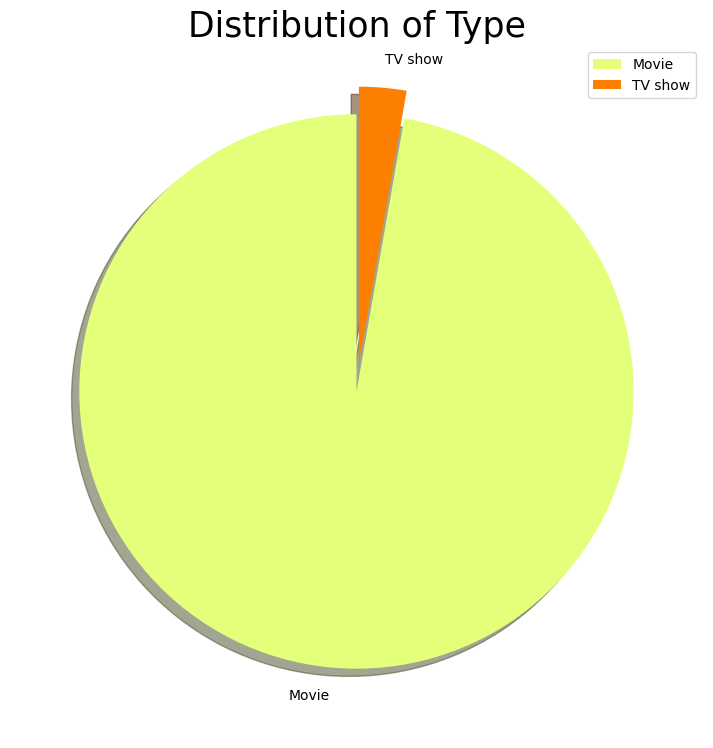

In [33]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

In [27]:
data_types = df.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types.index, values=data_types.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

In [28]:

#Number of Movies and TV shows released in years

fig = px.histogram(df,x="release_year", title="release_year", color="release_year")

fig.update_layout(
    bargap=0.2
)
fig.show()

d:\Python\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [29]:
ax = px.histogram(df,x="country",marginal="box",title="country")
ax.update_layout(bargap=0.2)

************************************************
 listed_in
Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: count, Length: 335, dtype: int64 
************************************************


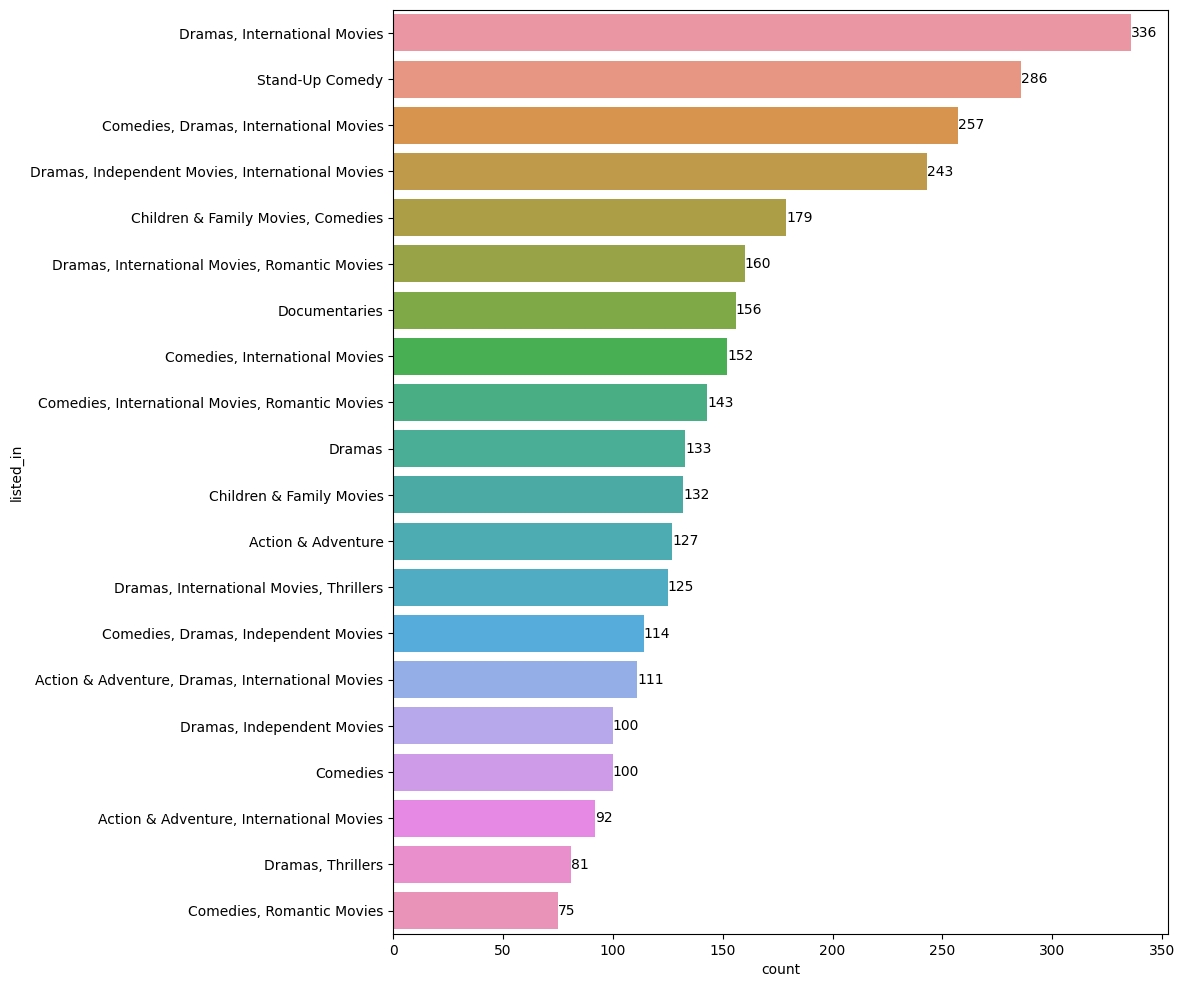

In [30]:

#Movies and TV shows genres count visualization

len(df['listed_in'].unique())
print('************************************************\n',df['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=df, y="listed_in", order=df['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()

In [31]:

#Ratings over the genres

fig = px.histogram(df,x="rating", title="Rating", color="rating")

fig.update_layout(
    bargap=0.2
)
fig.show()

d:\Python\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### Word Cloud

In [34]:
from wordcloud import WordCloud

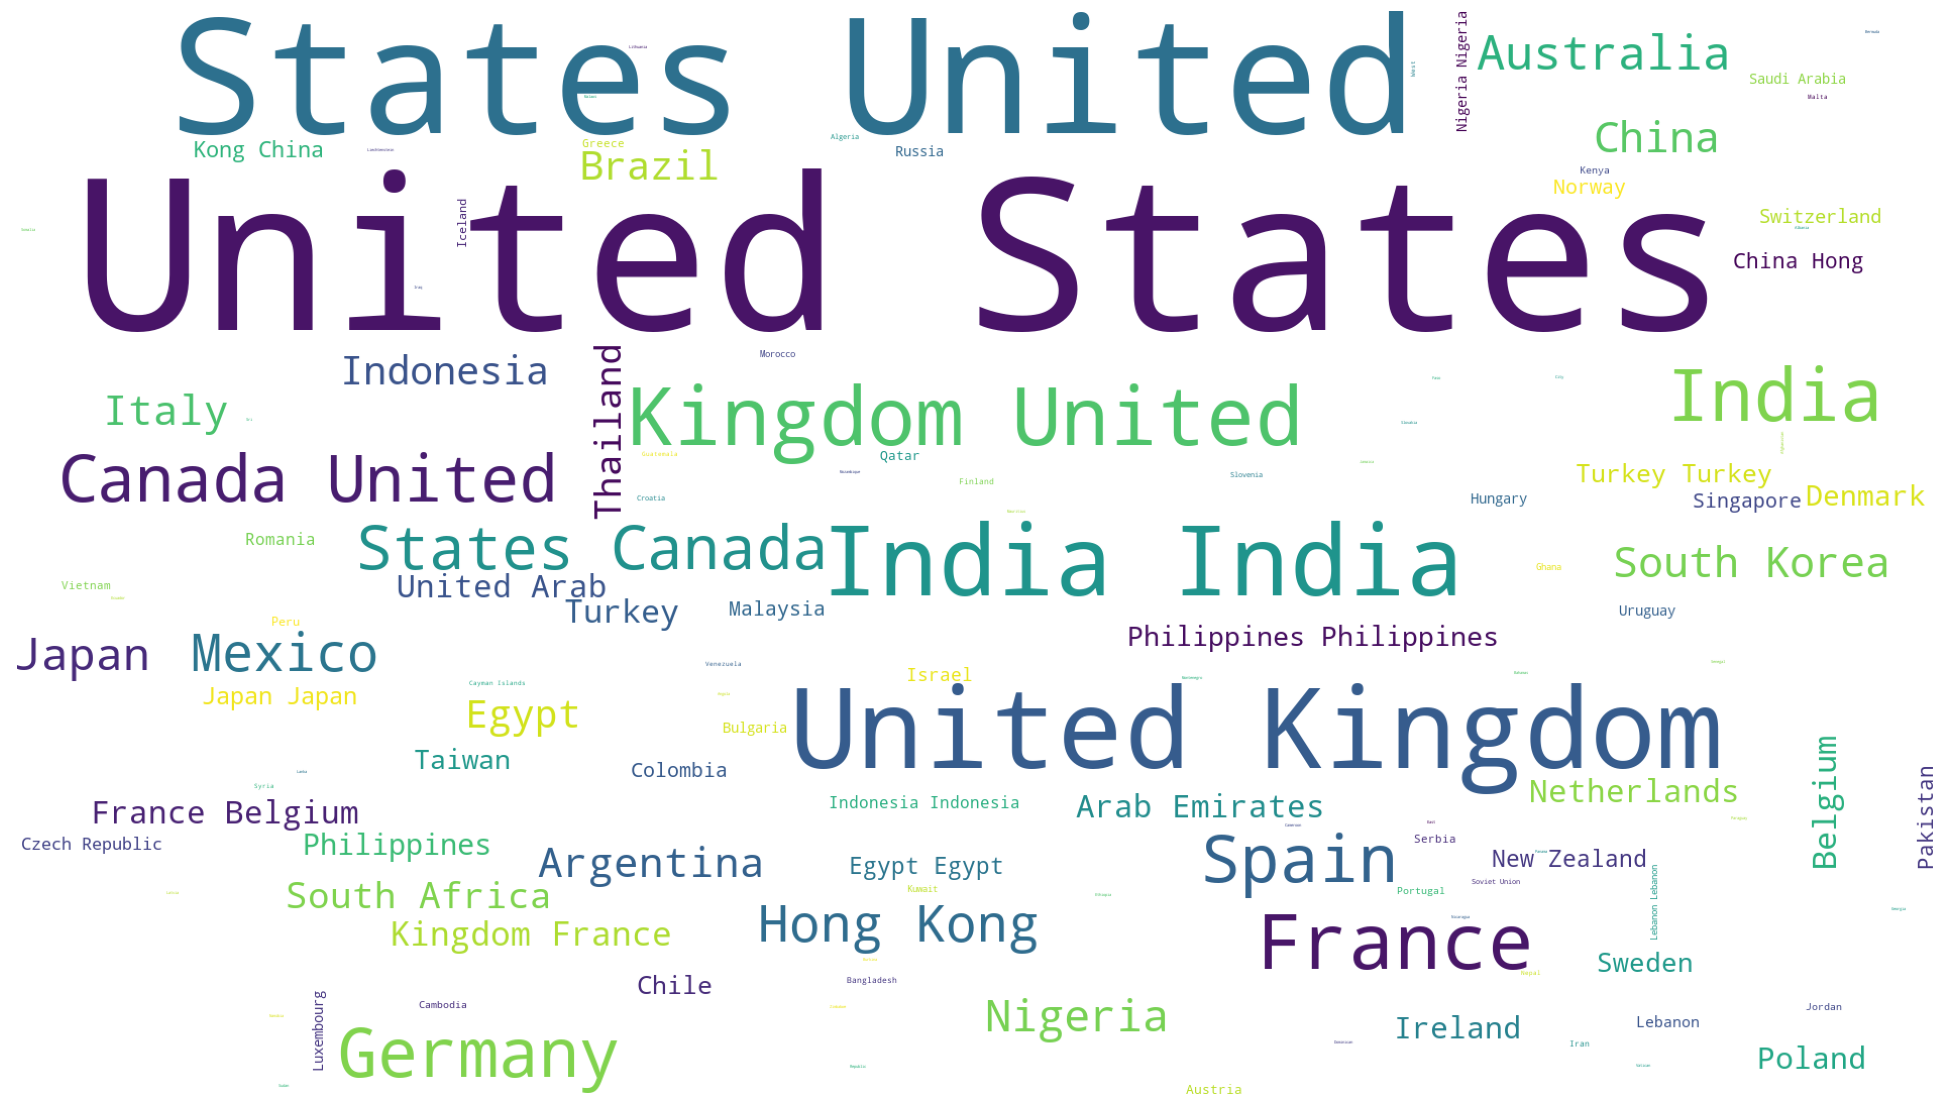

In [35]:

#Country

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

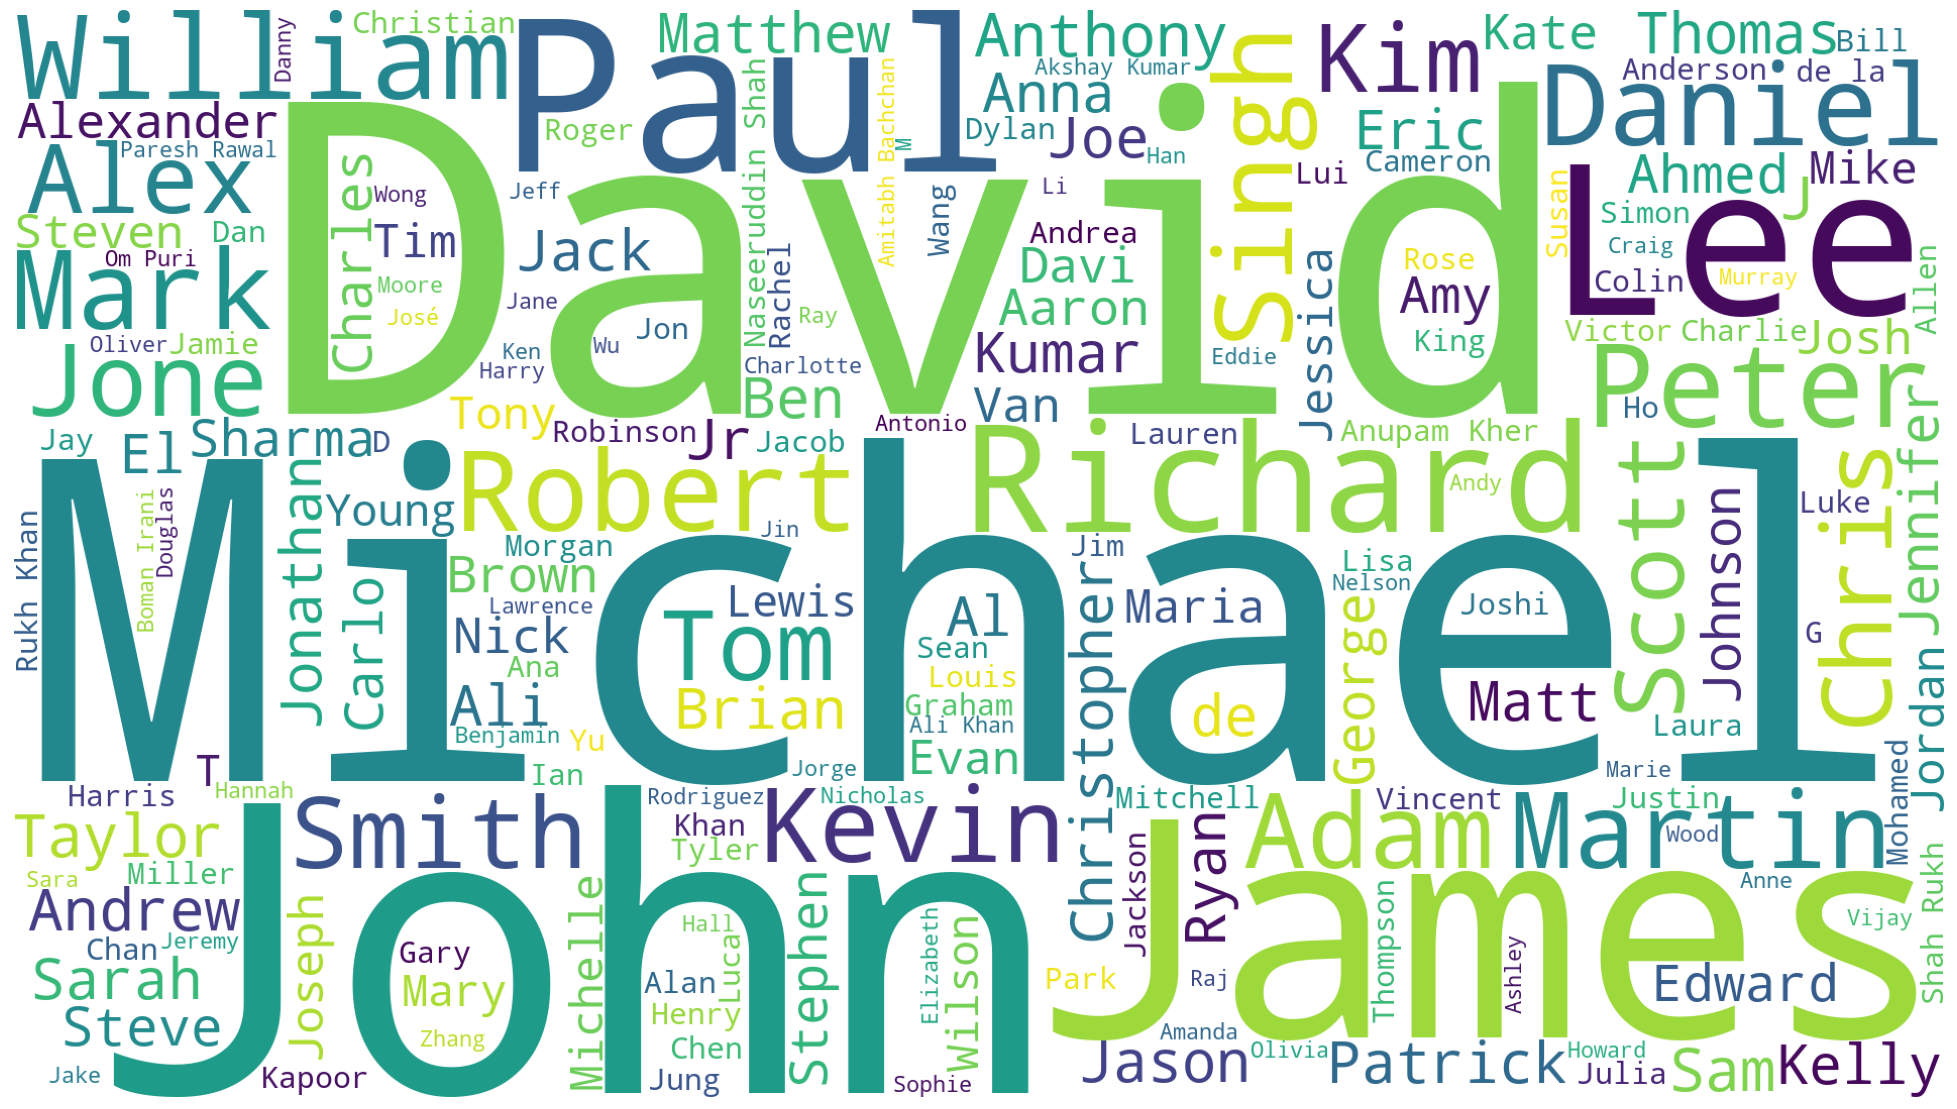

In [36]:

#Cast

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

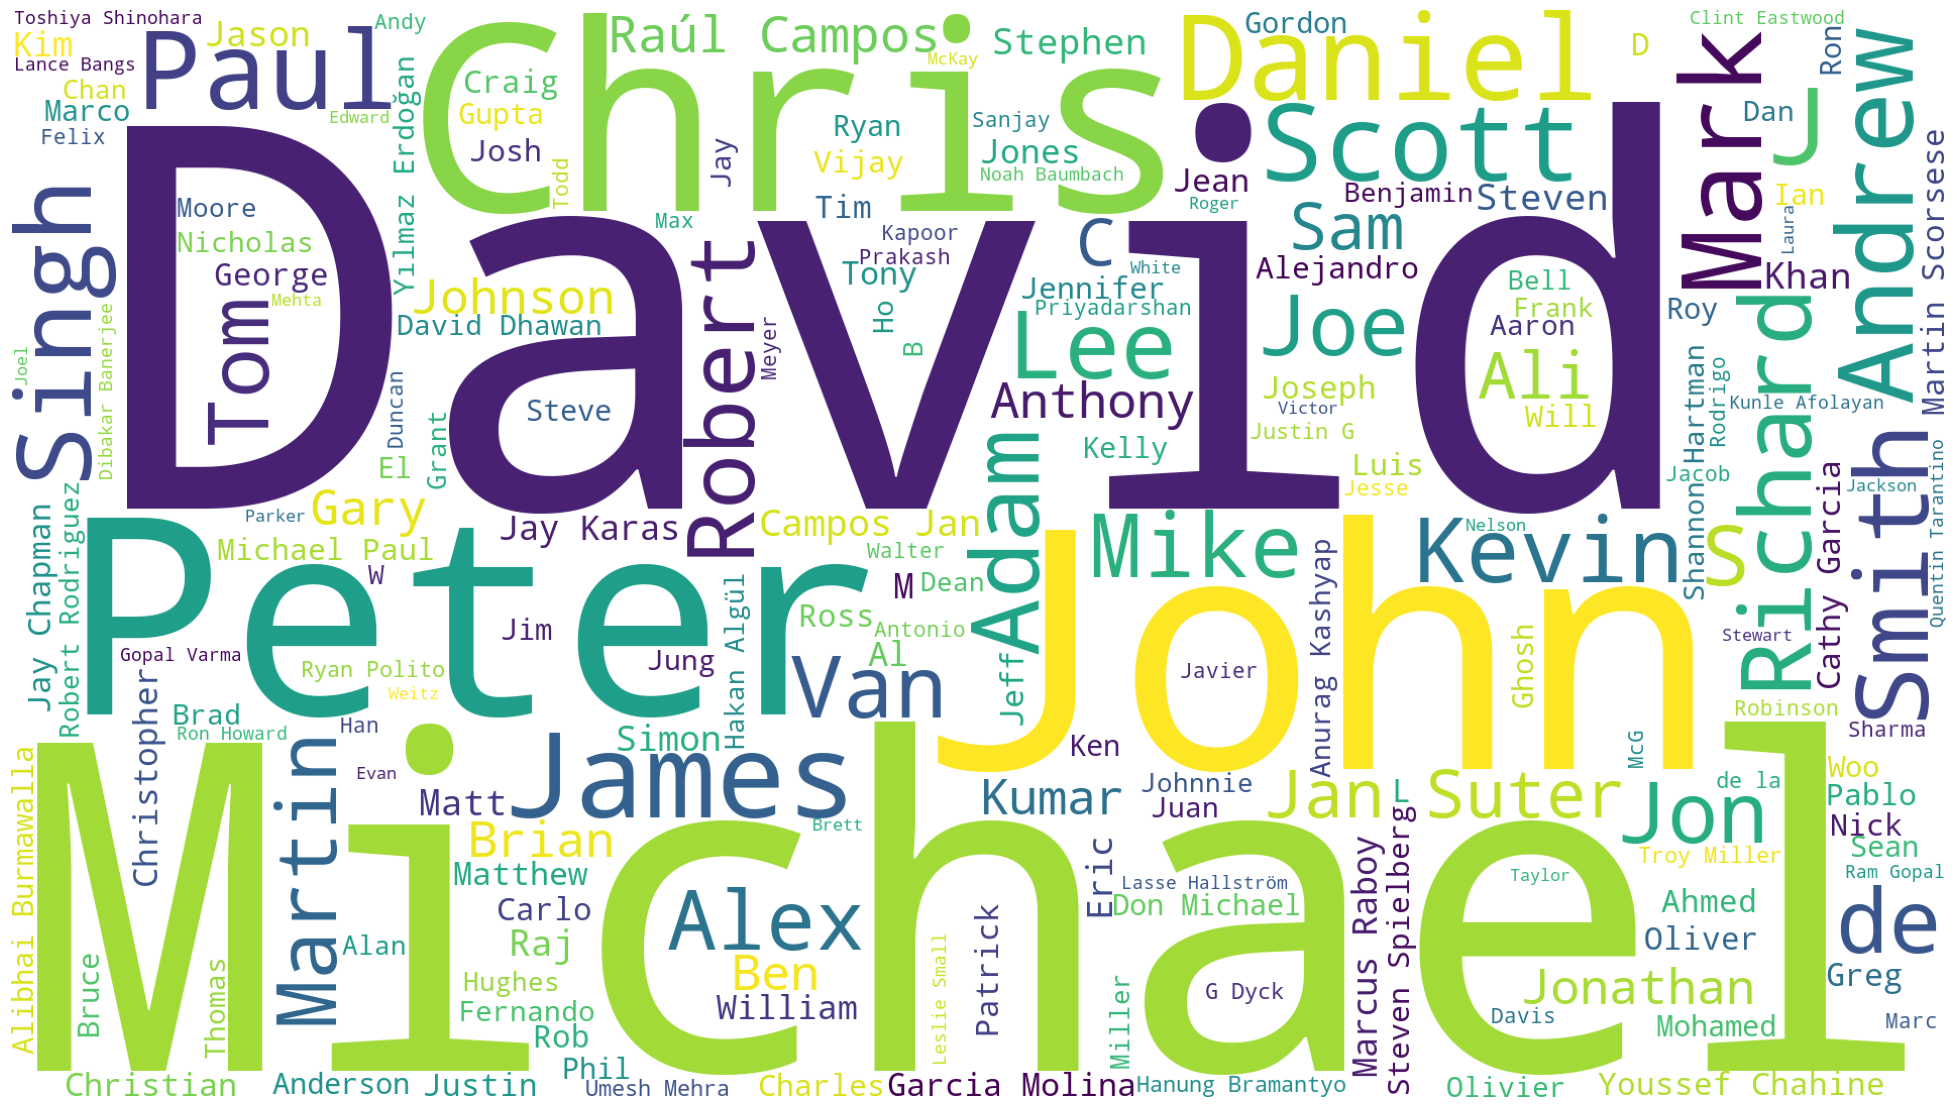

In [37]:

#Directors

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920, height=1080).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

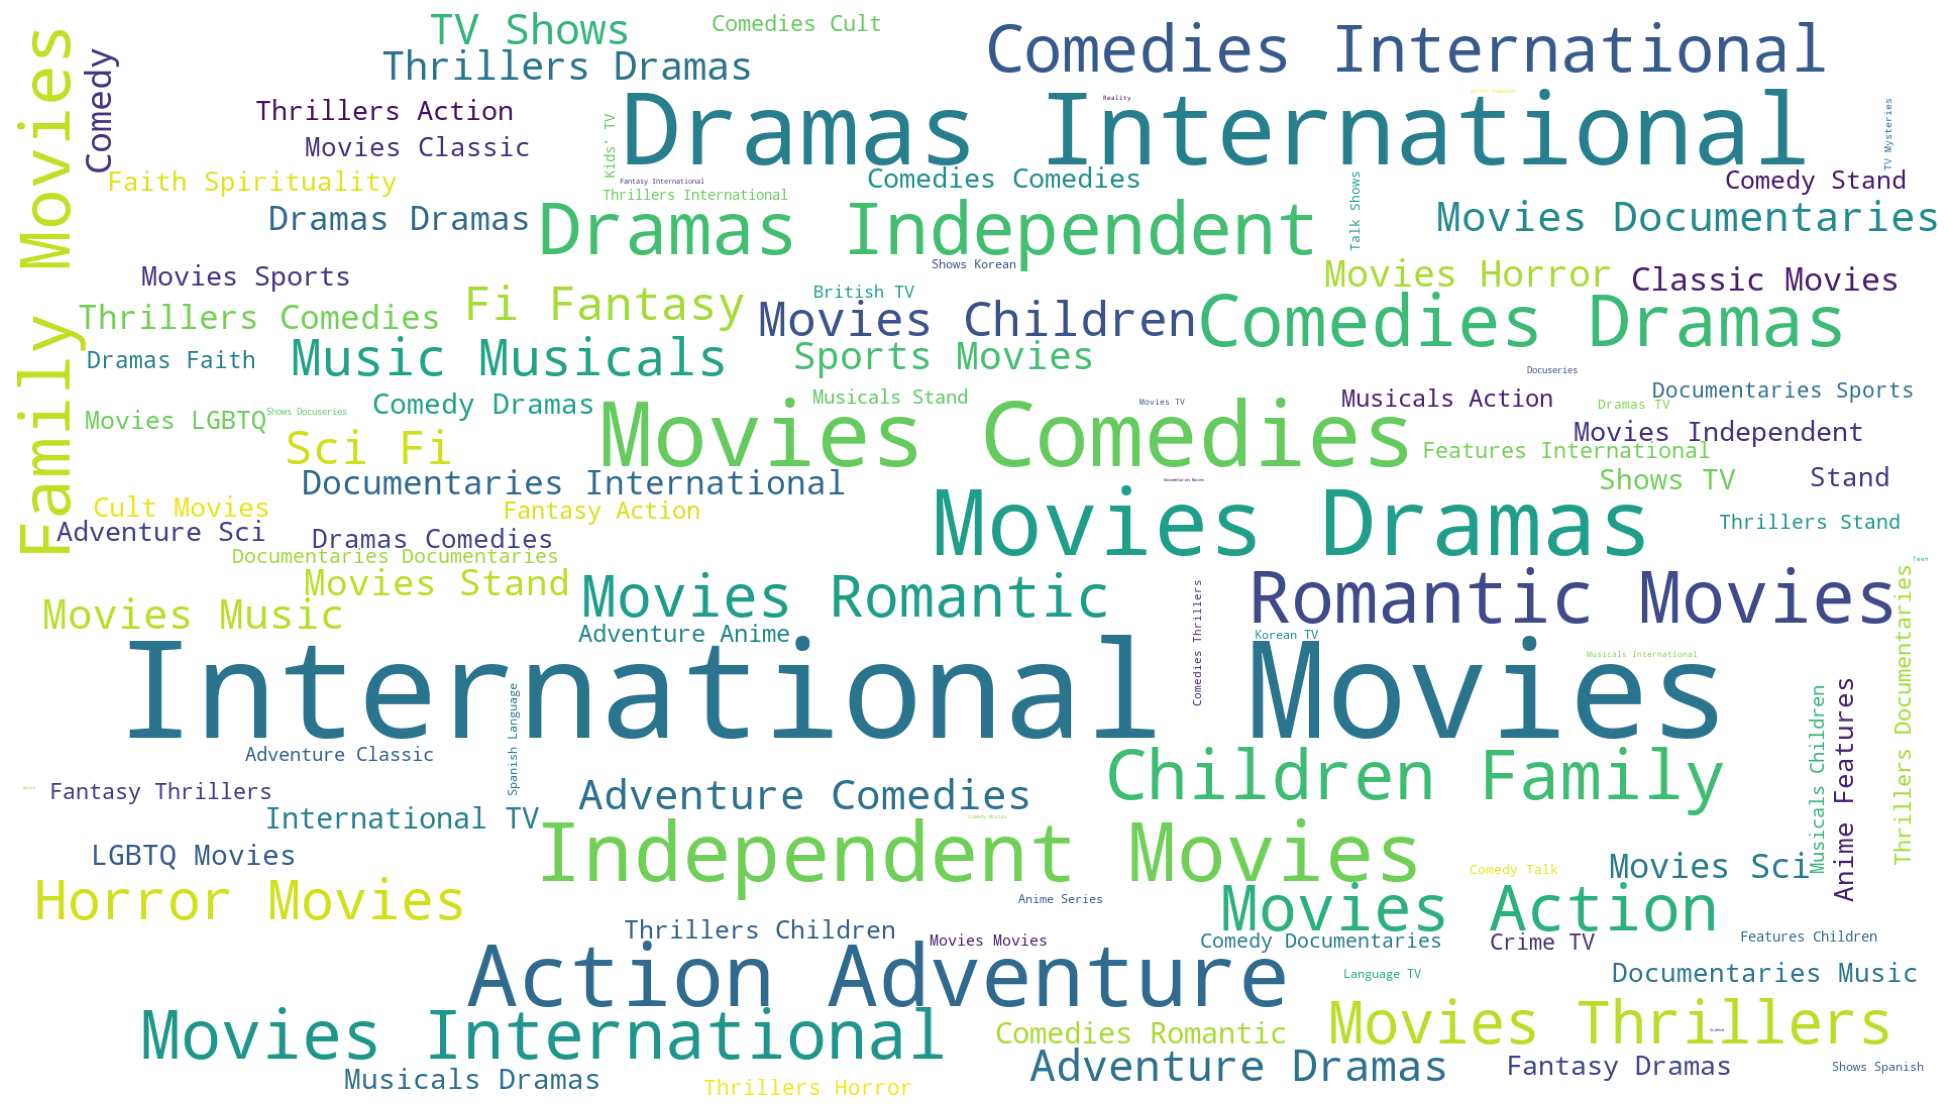

In [38]:

#Catregories

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()